In [1]:
import time      
import os 
import requests
import logging
import threading
import bs4
from bs4 import BeautifulSoup  
import pandas as pd
import scipy as sc
import numpy as np
import json
import matplotlib.pyplot as plt      
from matplotlib import figure
from pylab import rcParams

In [2]:
df = pd.DataFrame(pd.read_excel("fullDF.xlsx", index_col=0))
df.head(8000)

,names,times,dates,latitudes,longitudes,idPlaces,districts,forms,PeopleNumbers,distances
0,צוחר,01:49,21.05.2021,31°14′11″N,34°25′33″E,1136,הדרום,יישובים כפריים אחרים יהודיים,444.000000,34.900000
1,מבטחים,01:49,21.05.2021,31°14′25″N,34°24′29″E,829,הדרום,מושבים - לרבות כפרים שיתופיים,439.000000,35.200000
2,כיסופים,01:49,21.05.2021,31°22′31″N,34°23′57″E,840,הדרום,קיבוצים,280.000000,22.600000
3,סופה,01:34,21.05.2021,31°14′14″N,34°20′32″E,1238,הדרום,קיבוצים,211.000000,38.400000
4,פרי גן,01:34,21.05.2021,31°13′18″N,34°21′17″E,1231,הדרום,מושבים - לרבות כפרים שיתופיים,246.000000,39.300000
...,...,...,...,...,...,...,...,...,...,...
7073,ניר יצחק,02:12,24.04.2021,31°14′16″N,34°21′28″E,402,הדרום,קיבוצים,630.000000,37.900000
7074,מבטחים,02:11,24.04.2021,31°14′25″N,34°24′29″E,829,הדרום,מושבים - לרבות כפרים שיתופיים,439.000000,35.200000
7075,כפר מימון,01:50,24.04.2021,31°25′58″N,34°32′07″E,1095,הדרום,מושבים - לרבות כפרים שיתופיים,375.000000,11.400000
7076,כיסופים,22:59,23.04.2021,31°22′31″N,34°23′57″E,840,הדרום,קיבוצים,280.000000,22.600000


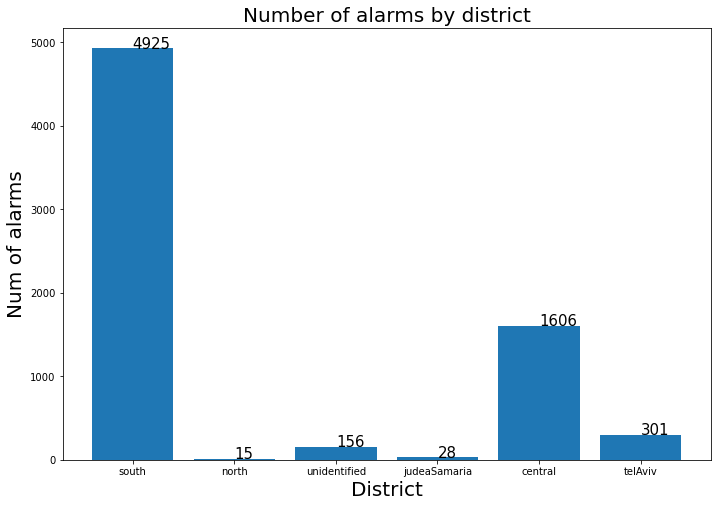

In [3]:
south = 0
north = 0
other = 0
telAviv = 0
judeaSamaria = 0
central=0

for index,row in df.iterrows():
    district = row['districts']
    if(district == "הדרום"):
        south+= 1
    if(district == "הצפון"):
        north+= 1
    if(district == "unidentified"):
        other+= 1
    if(district == "יהודה והשומרון"):
        judeaSamaria+= 1
    if(district == "המרכז"):
        central+= 1
    if(district == "תל אביב"):
        telAviv+= 1

fig = plt.figure()
ax = fig.add_axes([1.5,1.5, 1.5, 1.5])
num = [south, north, other, judeaSamaria,central, telAviv]
districts = ['south', 'north', 'unidentified', 'judeaSamaria', 'central', 'telAviv']
ax.bar(districts,num)
ax.set_title('Number of alarms by district', fontdict={'fontsize':20})
plt.xlabel('District', fontdict={'fontsize':20})
plt.ylabel('Num of alarms', fontdict={'fontsize':20})

for index,data in enumerate(num):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=15))
plt.show()

dates
2021-04-22       1
2021-04-23       1
2021-04-24      28
2021-04-26       4
2021-05-09       7
2021-05-10     202
2021-05-11    1180
2021-05-12    1269
2021-05-13     814
2021-05-14     626
2021-05-15     847
2021-05-16     654
2021-05-17     333
2021-05-18     341
2021-05-19     331
2021-05-20     409
2021-05-21      31
dtype: int64


Text(0, 0.5, 'Num of alarms')

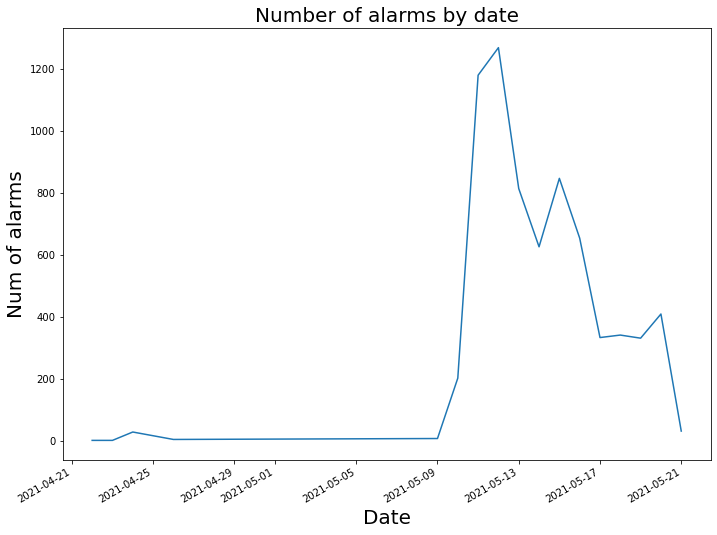

In [4]:
fig = plt.figure()
ax = fig.add_axes([1.5,1.5, 1.5, 1.5])

df['dates'] = pd.to_datetime(df['dates'], dayfirst=True)
df.sort_values(by='dates')
alarms = df.pivot_table(index = ['dates'], aggfunc ='size')
print (alarms)

plt = alarms.plot.line()
plt.set_title('Number of alarms by date', fontdict={'fontsize':20})
plt.set_xlabel('Date', fontdict={'fontsize':20})
plt.set_ylabel('Num of alarms', fontdict={'fontsize':20})

times
00:02     4
00:07     1
00:09    19
00:10    50
00:11    50
         ..
23:49     7
23:50     1
23:51     5
23:56     3
23:59     5
Length: 726, dtype: int64


Text(0, 0.5, 'Num of alarms')

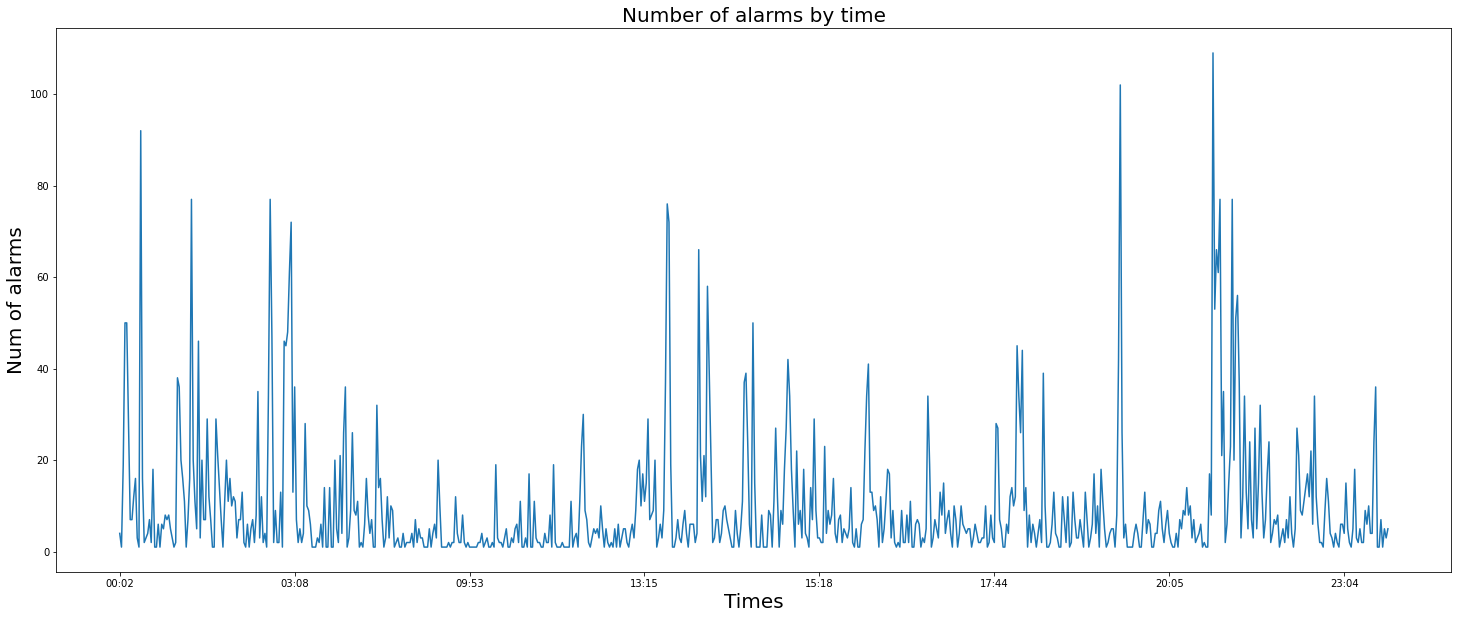

In [5]:
import numpy as np
import matplotlib.pyplot as plt

ax1 = fig.add_axes([1,1,1,1])
fig, (ax1) = plt.subplots(1)
df.sort_values(by='times')
alarms = df.pivot_table(index = ['times'], aggfunc ='size')
print (alarms)
fig.set_size_inches(25, 10, forward=True)
plt2 = alarms.plot.line()
plt2.set_title('Number of alarms by time', fontdict={'fontsize':20})
plt2.set_xlabel('Times', fontdict={'fontsize':20})
plt2.set_ylabel('Num of alarms', fontdict={'fontsize':20})

Text(0.5, 1.0, 'Full time alarms')

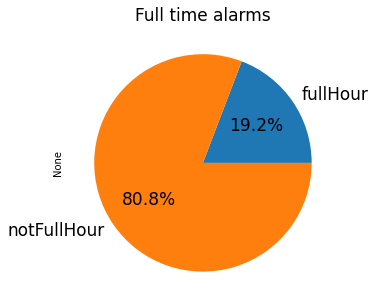

In [6]:
fullHour = 0
notFullHour = 0

for index,row in df.iterrows():
    time = row['times']
    minutes=time.split(':')[1]
    if(minutes=="00" or minutes=="01" or minutes=="02" or minutes=="59" or minutes=="58"):
        fullHour+= 1
    else:
        notFullHour+= 1
fig, axes = plt.subplots(1, figsize=(20,5))
data = pd.Series([fullHour, notFullHour], index=['fullHour', 'notFullHour'])
data.plot(kind = 'pie', ax=axes, autopct='%1.1f%%', fontsize=17,)
plt.title('Full time alarms',  fontsize=17)

          names   latitudes  longitudes  PeopleNumbers  distances  size
30          ארז  31°33′37″N  34°33′59″E          558.0        3.5    61
285      ניר עם  31°31′11″N  34°34′48″E          611.0        3.6   178
408       שדרות  31°31′40″N  34°35′40″E        27635.0        3.7    90
246      מפלסים  31°30′07″N  34°33′43″E         1023.0        4.0    71
296  נתיב העשרה  31°34′20″N  34°32′23″E          892.0        4.3   167
..          ...         ...         ...            ...        ...   ...
28       אעבלין  32°49′35″N  35°11′10″E        13305.0      155.9     1
204   כפר מסריק  32°53′26″N  35°06′01″E          868.0      158.8     2
317   עין המפרץ  32°54′12″N  35°05′48″E         1250.0      160.2     2
326         עכו  32°55′41″N  35°05′04″E        49380.0      161.8     3
251     משגב עם  33°14′52″N  35°32′54″E          339.0      211.9     1

[442 rows x 6 columns]


TypeError: 'Text' object is not callable

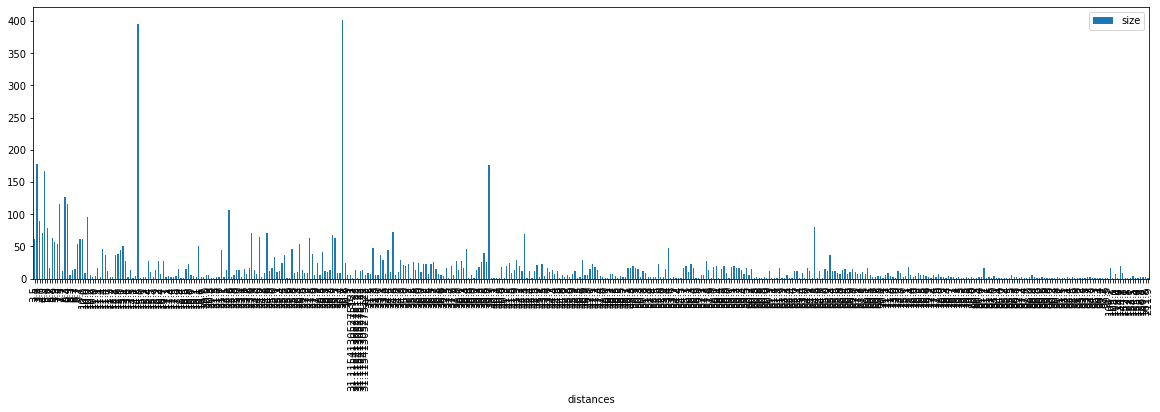

In [7]:
df = df[df.columns[(df.columns != 'times') & (df.columns != 'dates')
                 & (df.columns != 'districts')
                 & (df.columns != 'forms') &
                 (df.columns != 'idPlaces') ]]
df = df[df.distances != 'unidentified']
df = df.groupby(df.columns.tolist(),as_index=False).size()
df.distances = df.distances.astype(float)
df2 = df.sort_values('distances')
print (df2)
#df2 = df2[df2.columns[(df.columns != 'names')]]
fig, axes = plt.subplots(1, figsize=(20,5))
plt = df2.plot(x='distances', y='size', kind='bar', ax=axes) 
plt.title('number of alarms by distance',  fontsize=17)
df2.head(7000)
df2.to_excel("ML.xlsx")